In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt




In [2]:
'''
This script exctracts training variables from all logs from
tensorflow event files ("event*"), writes them to Pandas
and finally stores in long-format to a CSV-file including
all (readable) runs of the logging directory.
The magic "5" infers there are only the following v.tags:
[lr, loss, acc, val_loss, val_acc]
'''

import tensorflow as tf
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get all event* runs from logging_dir subdirectories
logging_dir = './all_logs/'
event_paths = glob.glob(os.path.join(logging_dir,"event*"))


# Extraction function
def sum_log(path):
    #runlog = pd.DataFrame(columns=['metric', 'value'])
    logs = pd.DataFrame(columns=["step", "step_s", "D/loss_real","D/loss_fake","D/loss_cls","D/loss_gp","D/loss_total","G/loss_fake","G/loss_rec","G/loss_cls","G/loss_total"])
    content = {"step" : 0 , "step_s" : 0 , "D/loss_real":0.0,"D/loss_fake":0.0,"D/loss_cls":0.0,"D/loss_gp":0.0,"D/loss_total":0.0,"G/loss_fake":0.0,"G/loss_rec":0.0,"G/loss_cls":0.0,"G/loss_total":0.0}
    c = 0

    for e in tf.compat.v1.train.summary_iterator(path):
        c += 1
        content["step_s"] = int(e.step)
        content["step"] = int(e.step)
        for v in e.summary.value:
            content[v.tag] = np.fromstring(v.tensor.tensor_content,dtype=np.float32).item()
        if(c%9 == 0):

            logs = pd.concat([logs, pd.DataFrame([content.copy()])], ignore_index=True)


    # Dirty catch of DataLossError

    return logs

# Call & append
all_log = pd.DataFrame()
for path in event_paths:
    log = sum_log(path)
    if log is not None:
        if all_log.shape[0] == 0:
            all_log = log
        else:
            all_log = pd.concat([all_log,log], ignore_index = True)



all = all_log.copy()






Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content[v.tag] = np.fromstring(v.tensor.tensor_content,dtype=np.float32).item()
C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  logs = pd.concat([logs, pd.DataFrame([content.copy()])], ignore_index=True)
C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content[v.tag] = np.fromstring(v.tensor.tensor_content,dtype=np.float32)

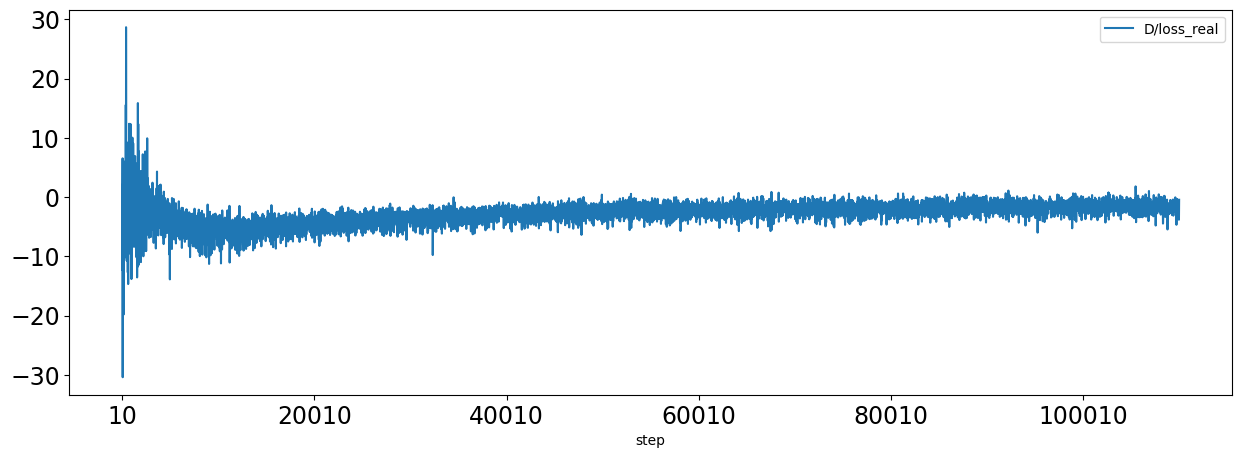

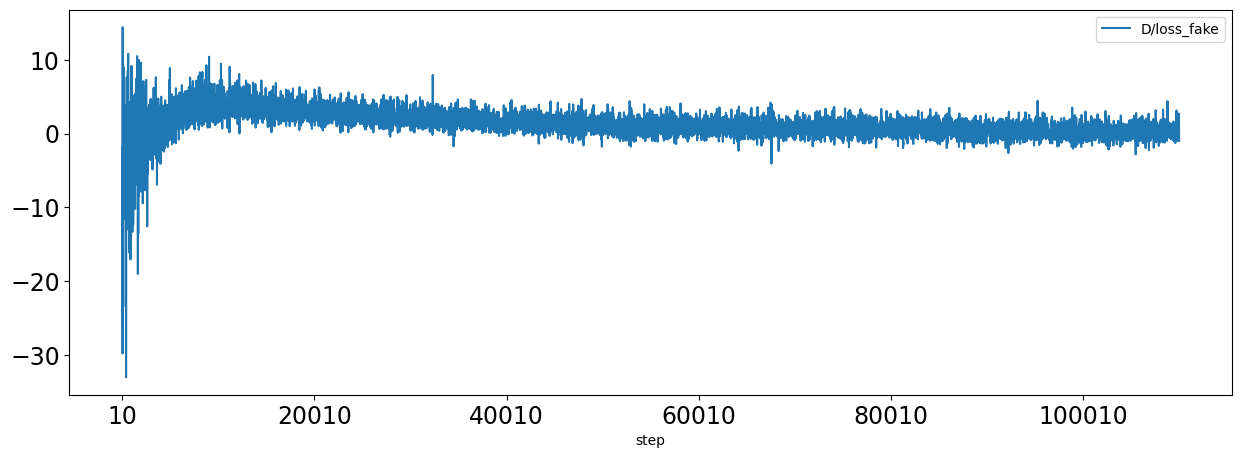

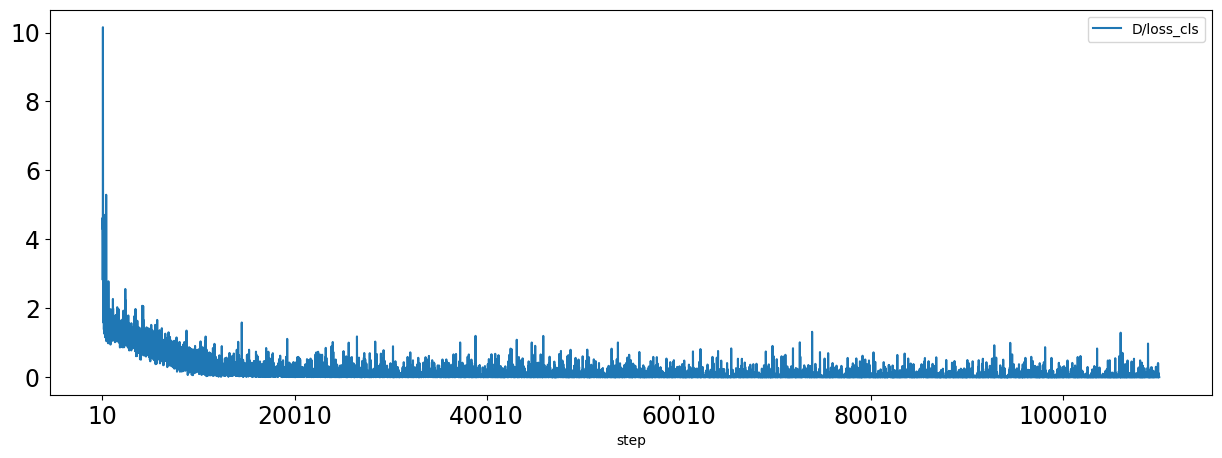

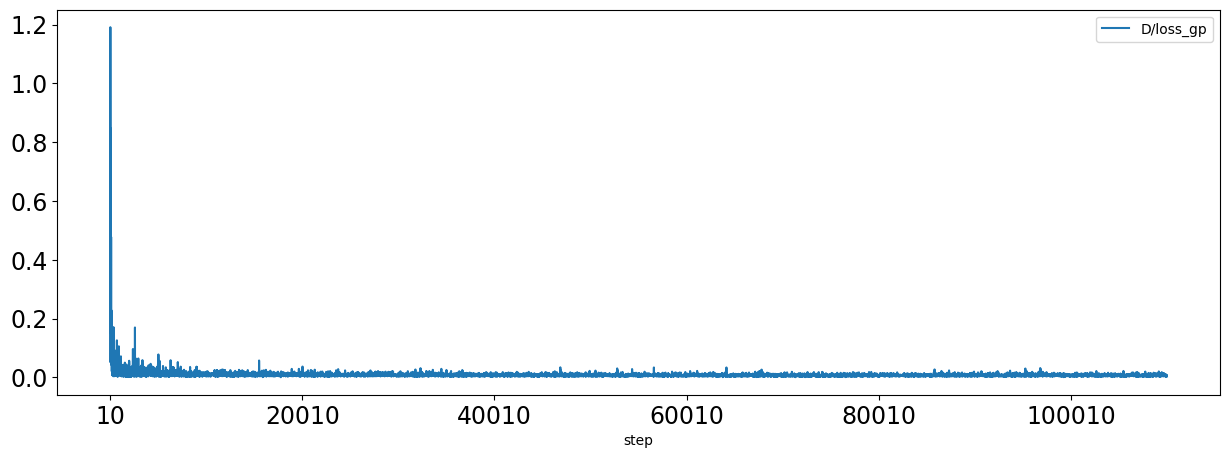

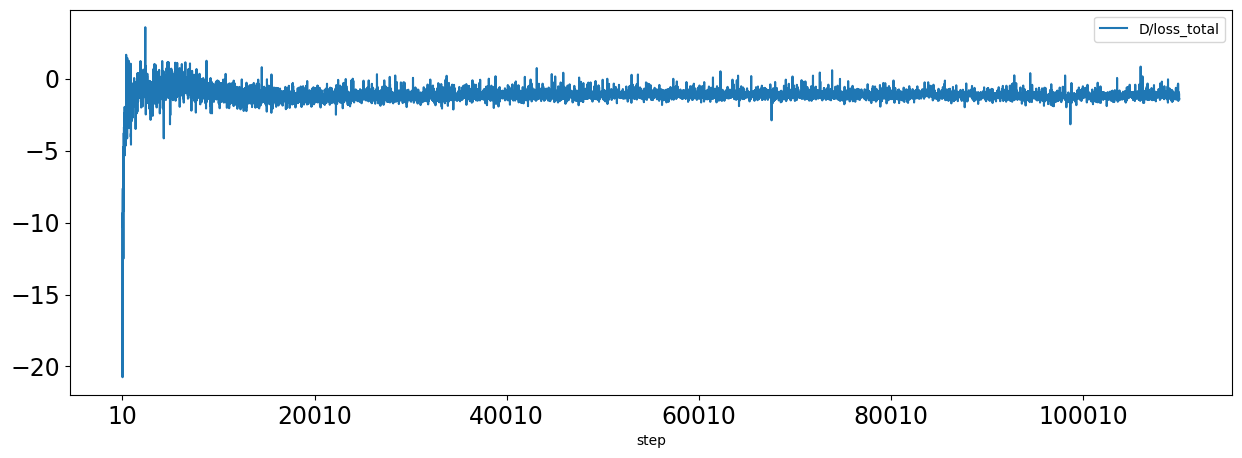

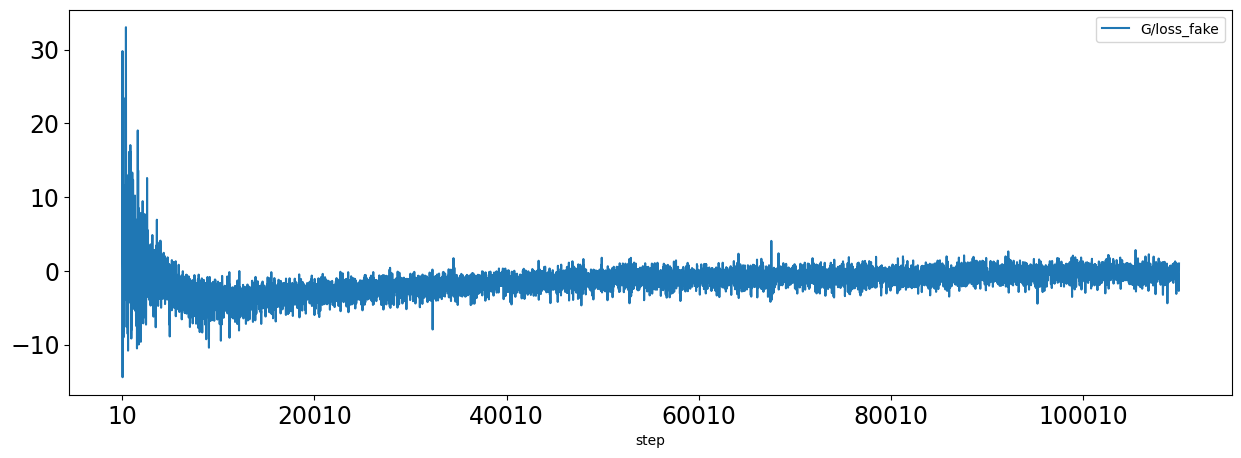

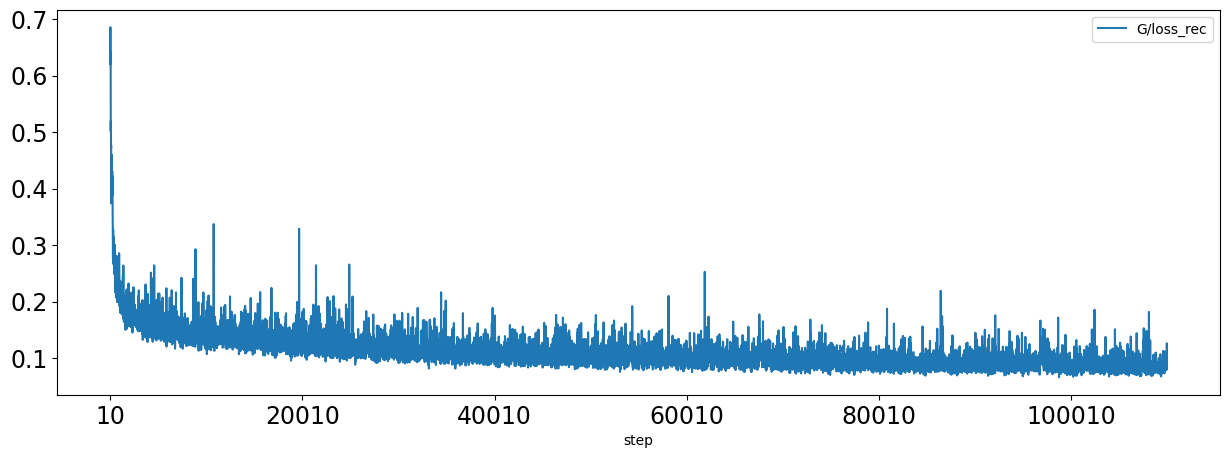

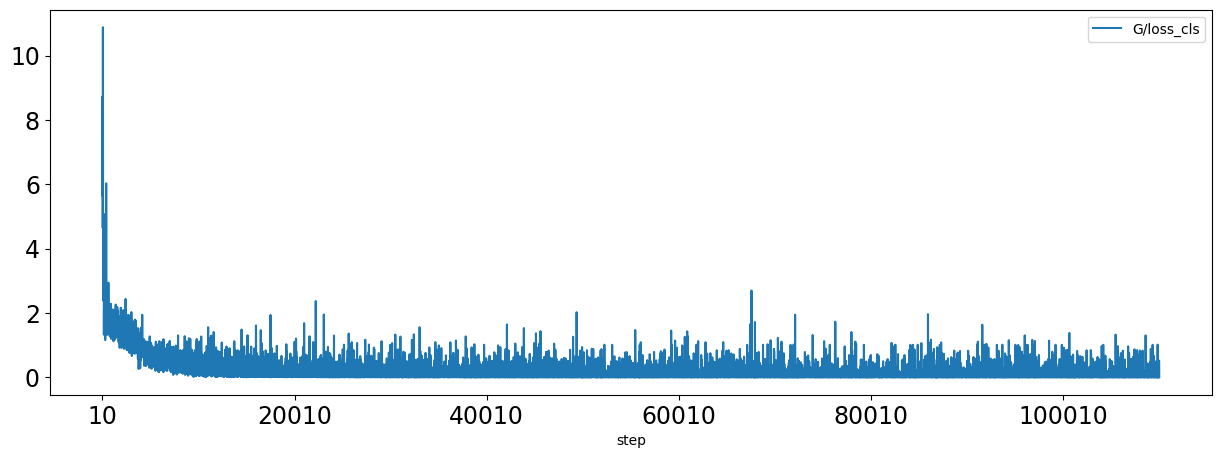

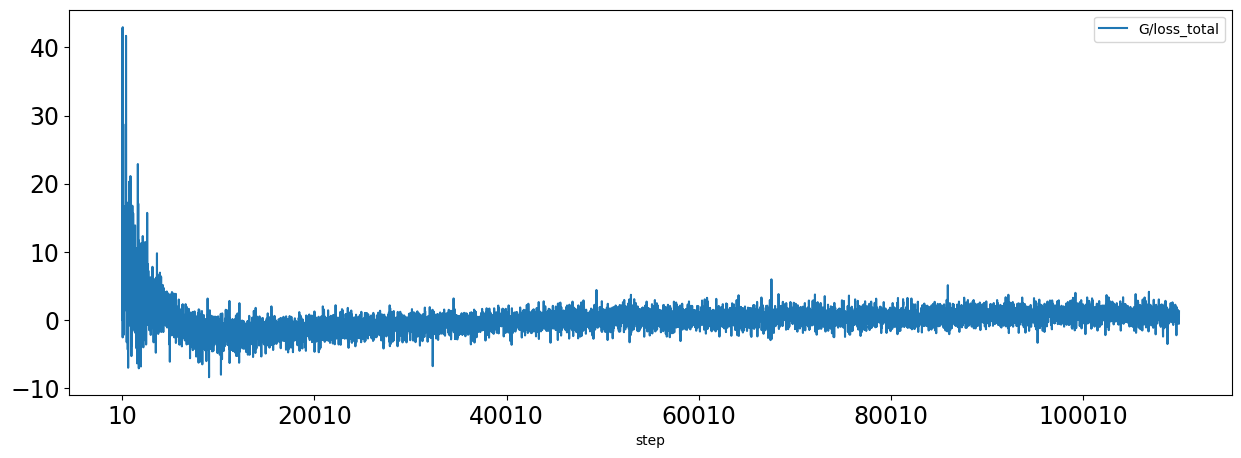

In [3]:

all_log = all.copy()
all_log = all_log.sort_values(by=['step_s'])
all_log = all_log.drop_duplicates("step")

for i in pd.DataFrame(all_log).columns:
    if(i == "step" or i == "step_s"):
        continue
    e = all_log.plot(x = 'step', y = i, subplots=True, figsize=(15,5), fontsize=17)[0].get_figure()
    e.savefig("Loss_visualization/" + i.split('/')[0] + "_" + i.split('/')[1] + ".jpg")



C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content[v.tag] = np.fromstring(v.tensor.tensor_content,dtype=np.float32).item()
C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  logs = pd.concat([logs, pd.DataFrame([content.copy()])], ignore_index=True)
C:\Users\Trung\AppData\Local\Temp\ipykernel_30784\2619002365.py:34: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content[v.tag] = np.fromstring(v.tensor.tensor_content,dtype=np.float32)

1000
1000


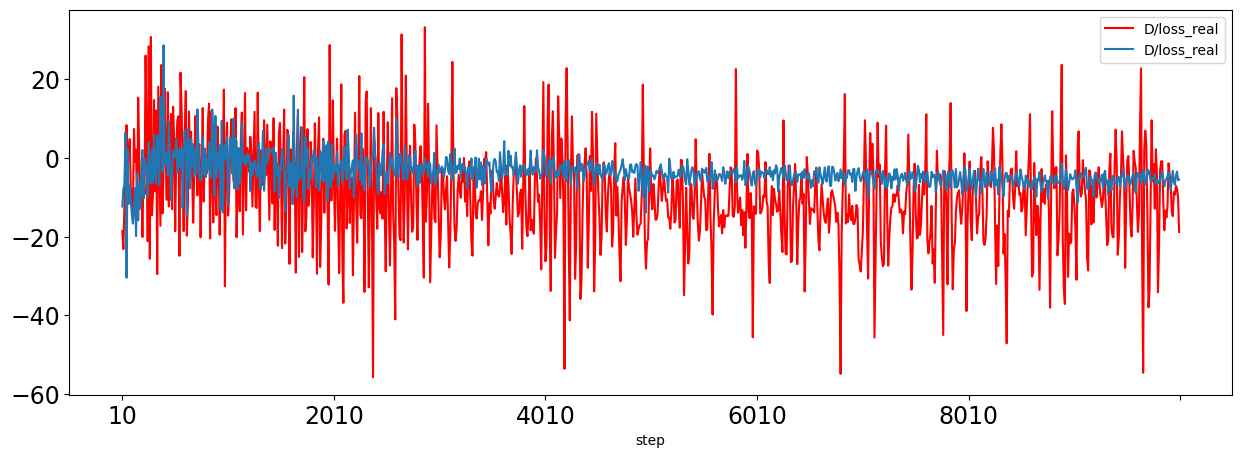

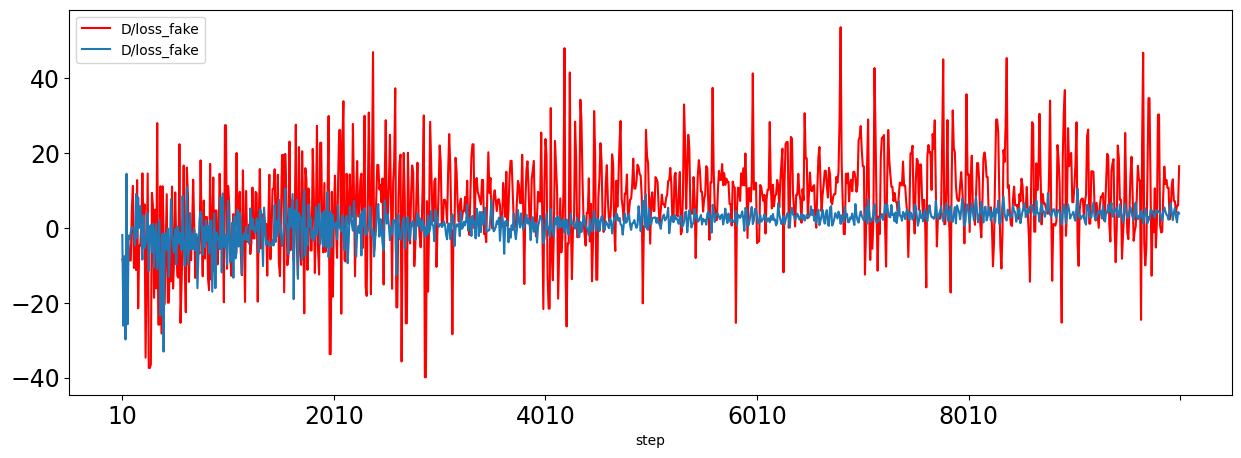

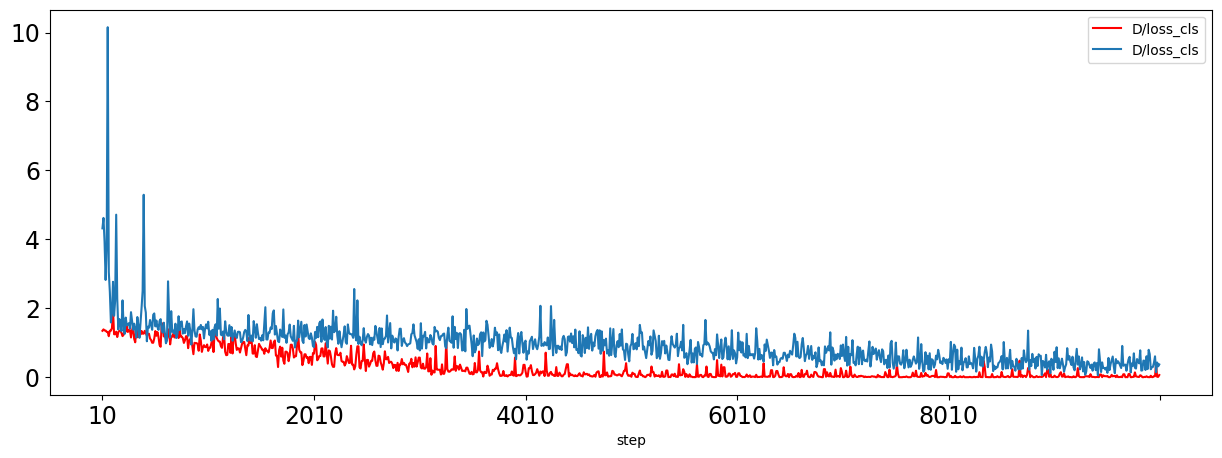

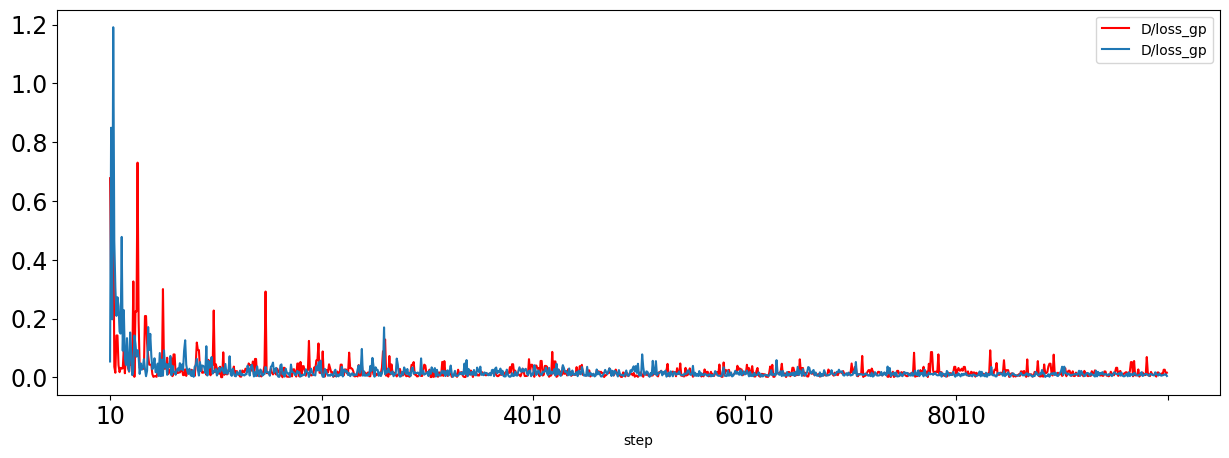

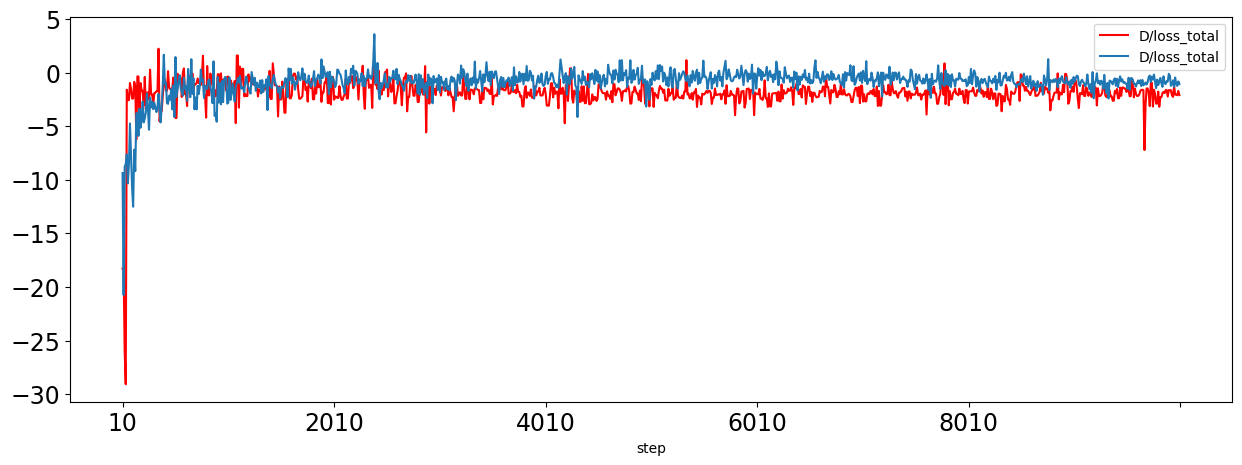

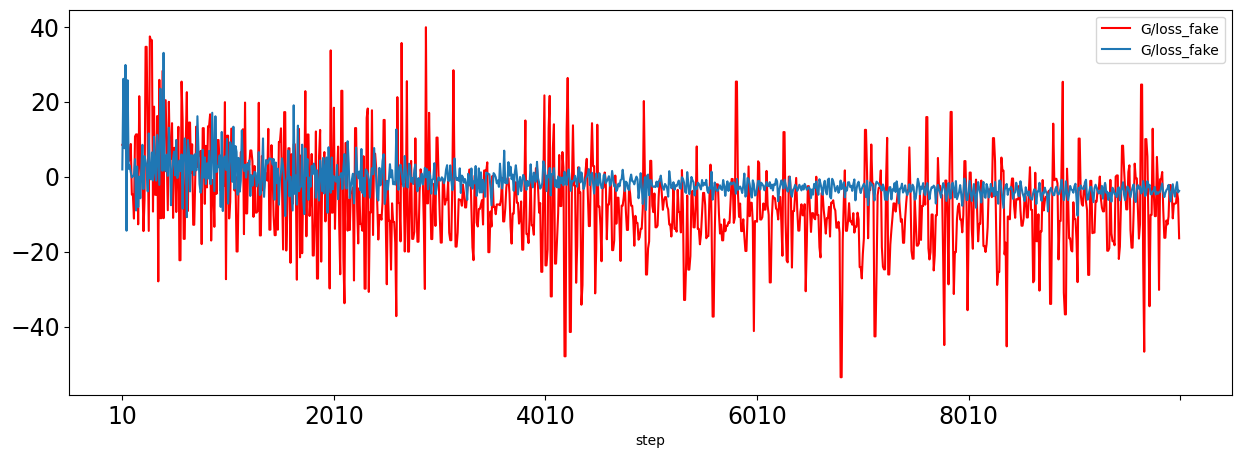

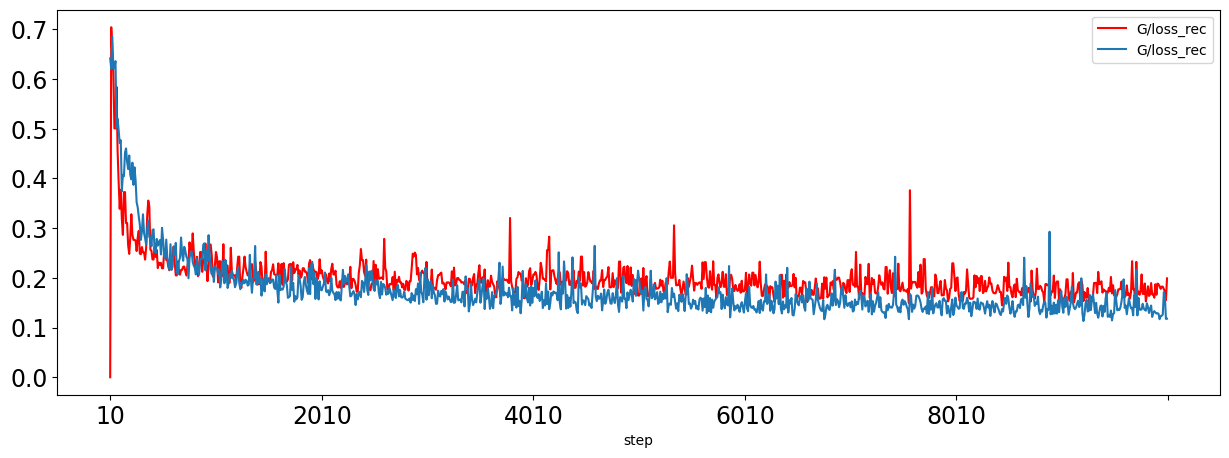

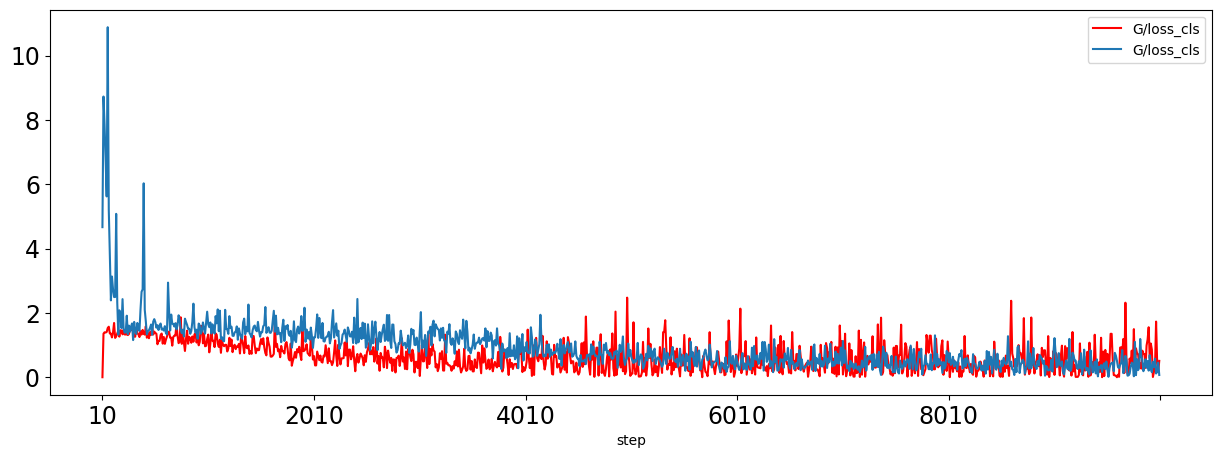

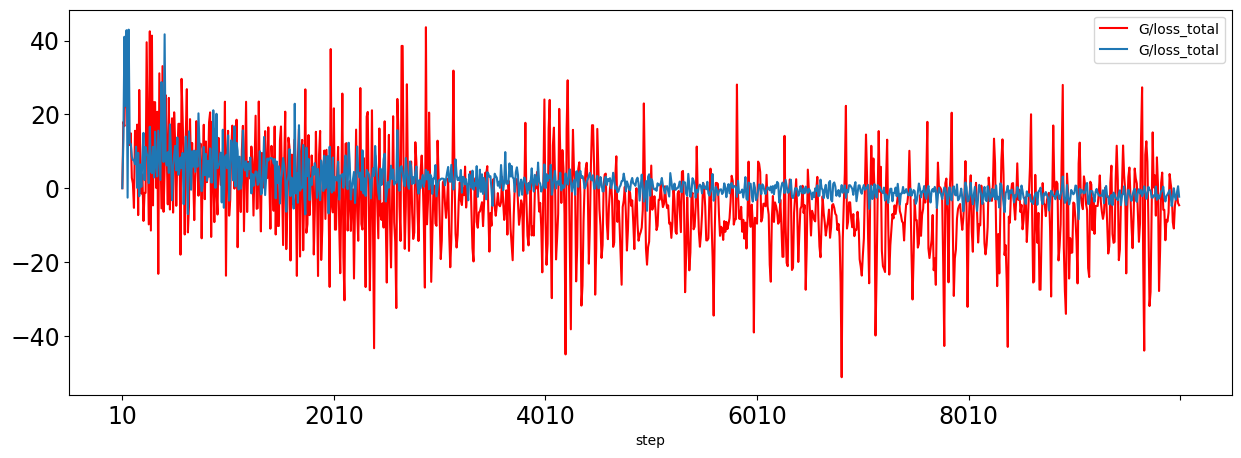

In [4]:
log_2d = pd.DataFrame()
log_2d = sum_log("2d_log/events.out.tfevents.1713409479.e57bfb76452f.4583.0.v2")

all_log = all.copy()
log2 = log_2d.copy()

all_log = all_log.sort_values(by=['step_s'])
all_log = all_log.drop_duplicates("step")
all_log = all_log[all_log["step"] <= 10000]
log2 = log2.sort_values(by=['step_s'])
log2 = log2.drop_duplicates("step")

print(len(all_log))
print(len(log2))

for i in pd.DataFrame(all_log).columns:
    if(i == "step" or i == "step_s"):
        continue
    f = log2.plot.line(x = 'step', y = i, subplots=True, figsize=(15,5), fontsize=17, color="red")
    e = all_log.plot.line(x = 'step', y = i, subplots=True, figsize=(15,5), fontsize=17, ax = f)
    f = f[0].get_figure()
    f.savefig("compare_loss/" + i.split('/')[0] + "_" + i.split('/')[1] + "_compare.jpg")




In [25]:
all_log = all.copy()
print(all_log[ (all_log["step"] >= 100000) & (all_log["step"] % 1000 == 0) ][['step','G/loss_fake', 'G/loss_rec', 'G/loss_cls']] )

         step  G/loss_fake  G/loss_rec    G/loss_cls
10110  100000     1.291683    0.092103  5.802919e-04
10210  101000    -1.159124    0.098991  8.225233e-03
10310  102000    -0.632497    0.100512  6.383402e-01
10410  103000    -0.108894    0.076001  8.753210e-02
10510  104000    -0.425279    0.084687  1.192093e-07
10610  105000    -1.799348    0.082418  1.786516e-05
10710  106000    -2.026245    0.069690  9.536774e-07
10810  107000     0.608732    0.098985  5.587951e-07
10910  108000    -0.791371    0.080448  7.260050e-04
11010  109000    -1.226650    0.078812  3.366518e-04
11110  110000     1.001525    0.088612  1.303852e-07
